In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
df = pd.read_csv('titanic_train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Overview

In [3]:
print(f'Shape of data set:\n\n {df.shape} \n')
print('----'*10)
print(f'Values: \n\n {df.values} \n')
print('----'*10)
print(f'Columns: \n\n{df.columns}\n')
print('----'*10)
print('Short data analyse: \n')
df.describe()

Shape of data set:

 (891, 12) 

----------------------------------------
Values: 

 [[1 0 3 ... 7.25 nan 'S']
 [2 1 1 ... 71.2833 'C85' 'C']
 [3 1 3 ... 7.925 nan 'S']
 ...
 [889 0 3 ... 23.45 nan 'S']
 [890 1 1 ... 30.0 'C148' 'C']
 [891 0 3 ... 7.75 nan 'Q']] 

----------------------------------------
Columns: 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

----------------------------------------
Short data analyse: 



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Let see how many passangers from data set has survived
print('Total number of passangers in the training data...', len(df))
print('Number of passangers in the training data who survived...', len(df[df['Survived'] == 1]))

Total number of passangers in the training data... 891
Number of passangers in the training data who survived... 342


In [6]:
# Defining function to identify missing value from all features
def missing_values (dataset):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False))
    missing_values= pd.concat([total,percent], axis=1, keys= ['Total', 'Percent'])
    return missing_values
print('Missing Values from Titanic data set')
print()
print (missing_values (df))

Missing Values from Titanic data set

             Total    Percent
Cabin          687  77.104377
Age            177  19.865320
Embarked         2   0.224467
Fare             0   0.000000
Ticket           0   0.000000
Parch            0   0.000000
SibSp            0   0.000000
Sex              0   0.000000
Name             0   0.000000
Pclass           0   0.000000
Survived         0   0.000000
PassengerId      0   0.000000


In [7]:
# Defining funcion to identify all numeric data
def numeric(data):
    numeric_cols = data.select_dtypes(np.number).columns.tolist()
    return data[numeric_cols].head(3)
print('Numeric features of data set are:')
print()
numeric_df= numeric(df)
print(numeric_df)

Numeric features of data set are:

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250


In [8]:
# Defining funcion to identify all categorical data
def categoric(data):
    categoric_cols = data.select_dtypes(exclude=np.number).columns.tolist()
    return data[categoric_cols].head(3)
print('Categoric features of data set are:')
print()
categoric_df= categoric(df)
print(categoric_df)

Categoric features of data set are:

                                                Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   

             Ticket Cabin Embarked  
0         A/5 21171   NaN        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282   NaN        S  


(7.5, -0.5)

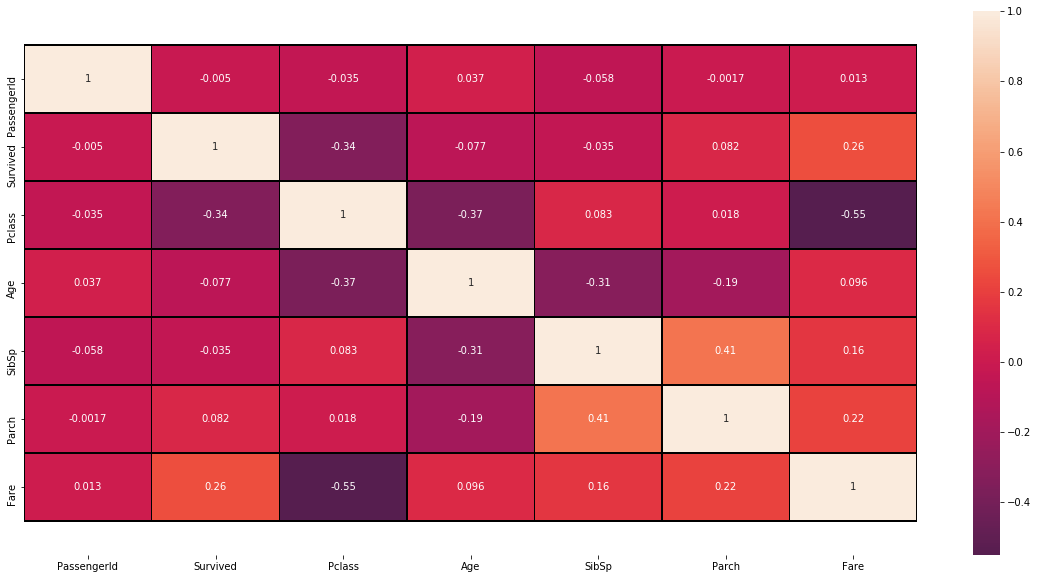

In [9]:
# Correlation 
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='rocket',annot_kws={'size': 10},
                linecolor='black', center=False,  linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

In [10]:
# Exploring survival by gender
print('% of men who survived', 100*np.mean(df['Survived'][df['Sex'] == 'male']))
print('% of women who survived', 100*np.mean(df['Survived'][df['Sex'] == 'female']))

% of men who survived 18.890814558058924
% of women who survived 74.20382165605095


In [11]:
# Exploring survival by class
print('% of passengers who survived in first class', 100*np.mean(df['Survived'][df['Pclass'] == 1]))
print('% of passengers who survived in second class', 100*np.mean(df['Survived'][df['Pclass'] == 2]))
print('% of passengers who survived in third class', 100*np.mean(df['Survived'][df['Pclass'] == 3]))

% of passengers who survived in first class 62.96296296296296
% of passengers who survived in second class 47.28260869565217
% of passengers who survived in third class 24.236252545824847


In [12]:
# Exploring survival by Age
print('% of children who survived', 100*np.mean(df['Survived'][df['Age'] < 18]))
print('% of adults who survived', 100*np.mean(df['Survived'][df['Age'] > 18]))

% of children who survived 53.98230088495575
% of adults who survived 38.26086956521739


# Data Visualization

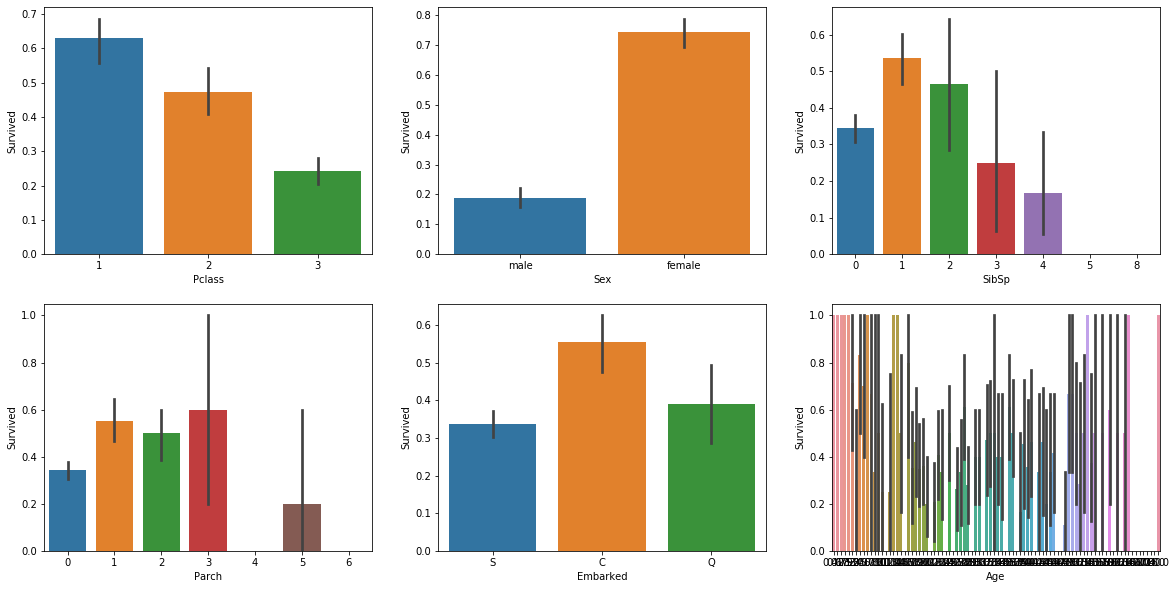

In [13]:
# Let see some visualisation of features

plain_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
start = 0
for j in range(2):
    for i in range(3):
        if start == len(plain_features):
            break
        sns.barplot(x=plain_features[start],
                    y='Survived', data=df, ax=ax[j, i])
        start += 1


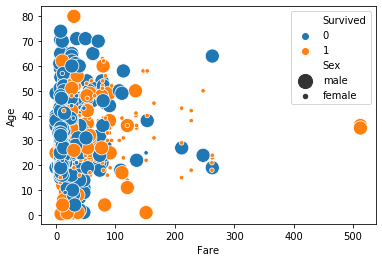

In [14]:
# Scatterplot 
ax = sns.scatterplot(x="Fare", y="Age", hue='Survived', size= 'Sex', data=df, color = 'red', sizes=(20, 200))

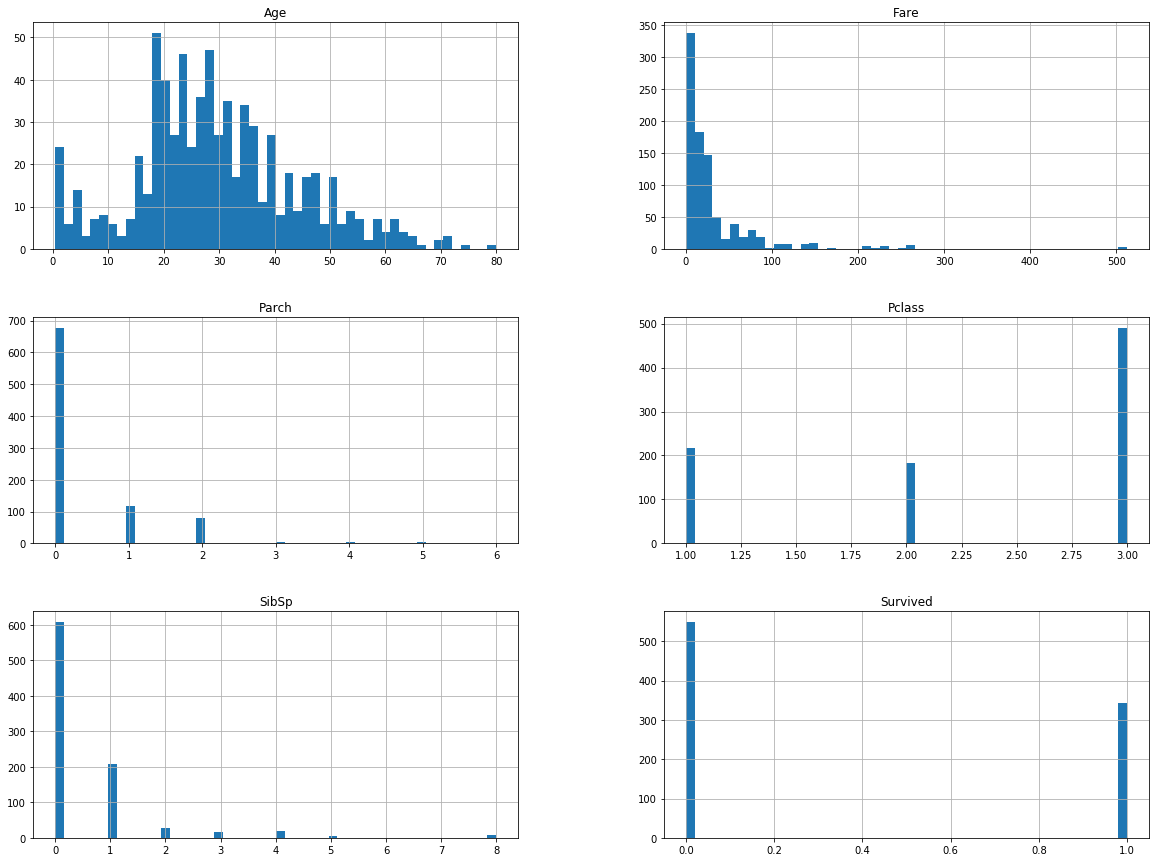

In [15]:
# Let's plot some histograms to have a previzualisation of some of the data
df.drop(['PassengerId'], 1).hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
# Compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


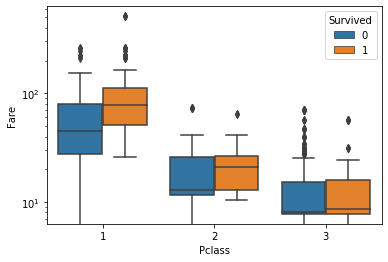

In [17]:
ax = sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=df)
ax.set_yscale('log')

It appears that the higher the fare was in the first class the higher survival chances a person from the 1st had.


# Deling with missing data

In [18]:
df2=df.copy()

In [19]:
df2.shape

(891, 12)

In [20]:
# Create a new feature to extract title names from the Name column
df2['Title'] = df2.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
print(df2.Title.value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Mme               1
Capt              1
Sir               1
the Countess      1
Ms                1
Lady              1
Jonkheer          1
Don               1
Name: Title, dtype: int64


In [21]:
# create standardized Title mapping
standardized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Aristorcat",
    "Don":        "Aristorcat",
    "Sir" :       "Aristorcat",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Aristorcat",
    "Dona":       "Aristorcat",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Aristorcat"
}
# map the normalized titles to the current titles 
df2.Title = df2.Title.map(standardized_titles)
# view value counts for the normalized titles
print(df2.Title.value_counts())

Mr            517
Miss          184
Mrs           127
Master         40
Officer        18
Aristorcat      5
Name: Title, dtype: int64


In [22]:
# group by Sex, Pclass, and Title 
grouped = df2.groupby(['Sex','Pclass', 'Title']) 
# view the median Age by the grouped features 
grouped.Age.median()

Sex     Pclass  Title     
female  1       Aristorcat    40.5
                Miss          30.0
                Mrs           40.0
                Officer       49.0
        2       Miss          24.0
                Mrs           31.5
        3       Miss          18.0
                Mrs           31.0
male    1       Aristorcat    40.0
                Master         4.0
                Mr            40.0
                Officer       51.0
        2       Master         1.0
                Mr            31.0
                Officer       46.5
        3       Master         4.0
                Mr            26.0
Name: Age, dtype: float64

In [23]:
# apply the grouped median value on the Age NaN
df2.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

In [24]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [25]:
#Mapping male to 0 and female to 1
df2['Sex']=df2['Sex'].map({'male':0,'female':1})
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [26]:
# We drop cabin because more than 70% of the data are missing
print('Percentage of missing values in cabin in train data:',(df2['Cabin'].isnull().sum()/len(df2['Cabin']))*100)
df2.drop(['Cabin'], axis=1, inplace = True)

Percentage of missing values in cabin in train data: 77.10437710437711


In [27]:
# Combining sibsp and parch to single family column
df2['Fam']=df2['SibSp']+df2['Parch']+1

In [28]:
# Filling missing values of embarked with S, as most comon value
df2['Embarked'].fillna(df2['Embarked'].mode()[0], inplace=True)

In [29]:
# Transform Embarked feature using OneHotEncoder because this is nominal feature
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(df2.loc[:, ['Embarked']])
df_enc = pd.DataFrame(ohe.transform(df2.loc[:, ['Embarked']]).toarray(), columns=ohe.get_feature_names())
df_enc.head(5)

,x0_C,x0_Q,x0_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [30]:
# Dropping unnecessary features
df2=df2.drop('Ticket',axis=1)
df2=df2.drop('SibSp',axis=1)
df2=df2.drop('Parch',axis=1)
df2=df2.drop('Name', axis=1)
df2=df2.drop('Title', axis=1)

In [31]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Fam
0,1,0,3,0,22.0,7.2500,S,2
1,2,1,1,1,38.0,71.2833,C,2
2,3,1,3,1,26.0,7.9250,S,1
3,4,1,1,1,35.0,53.1000,S,2
4,5,0,3,0,35.0,8.0500,S,1


In [32]:
# Now we will merge this two dataframes df2 and df_enc by index
df_transform = pd.concat([df2,df_enc], axis=1)
df_transform.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Fam,x0_C,x0_Q,x0_S
0,1,0,3,0,22.0,7.2500,S,2,0.0,0.0,1.0
1,2,1,1,1,38.0,71.2833,C,2,1.0,0.0,0.0
2,3,1,3,1,26.0,7.9250,S,1,0.0,0.0,1.0


In [33]:
# Finnaly, set up df with who we will work

df_ml=df_transform.drop(['PassengerId', 'Embarked'], axis=1)

In [34]:
# Assining X and y variables
X = df_ml.drop(['Survived'], axis = 1)
y = df_ml['Survived']
display(X.head(5))
display(y)

,Pclass,Sex,Age,Fare,Fam,x0_C,x0_Q,x0_S
0,3,0,22.0,7.2500,2,0.0,0.0,1.0
1,1,1,38.0,71.2833,2,1.0,0.0,0.0
2,3,1,26.0,7.9250,1,0.0,0.0,1.0
3,1,1,35.0,53.1000,2,0.0,0.0,1.0
4,3,0,35.0,8.0500,1,0.0,0.0,1.0


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [35]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (712, 8)
y_train shape: (712,)
X_test shape: (179, 8)
y_test shape: (179,)


In [37]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [38]:
# Distribution of normalized data train data
col_names = list(X.columns)
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
df_norm.head(3)

,Pclass,Sex,Age,Fare,Fam,x0_C,x0_Q,x0_S
0,1.0,1.0,0.382327,0.029758,0.2,1.0,0.0,0.0
1,0.5,0.0,0.382327,0.020495,0.0,0.0,0.0,1.0
2,0.5,0.0,0.382327,0.072227,0.2,1.0,0.0,0.0


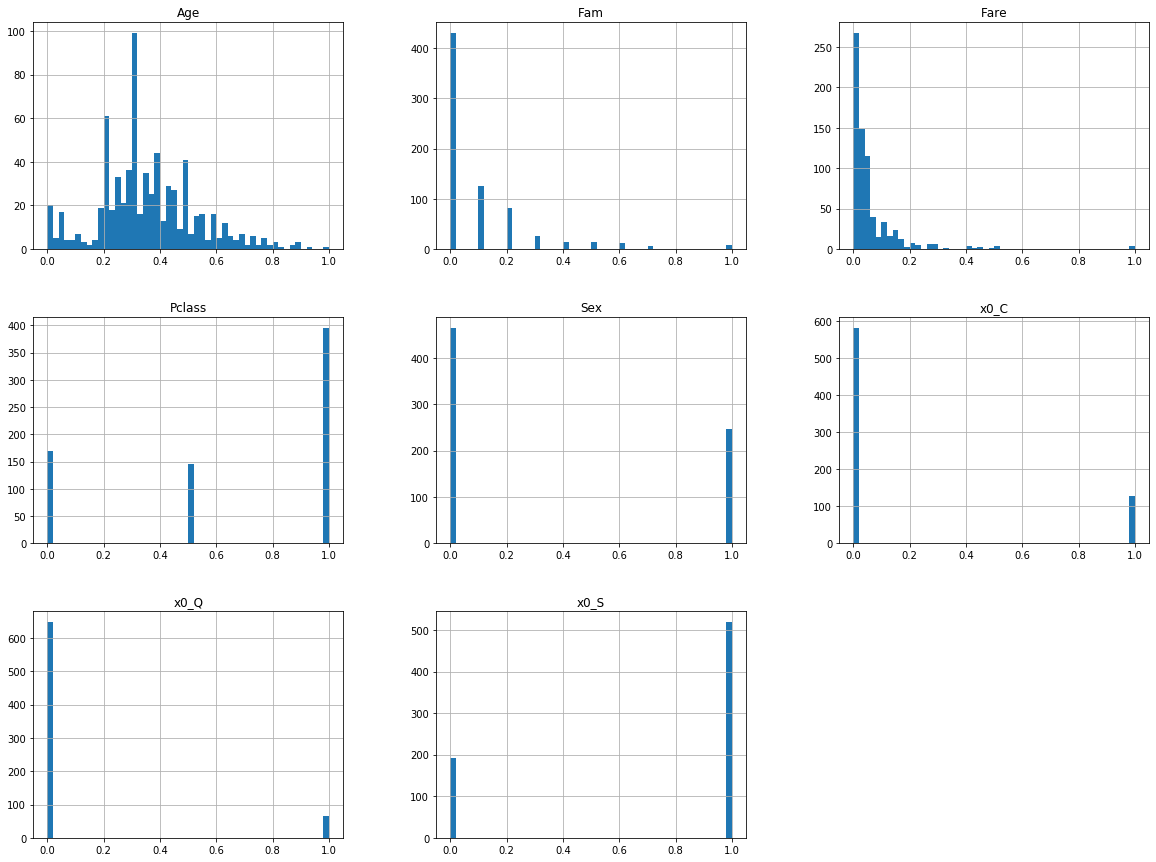

In [39]:
# Visualize normalized data
df_norm.hist(bins=50, figsize=(20,15))
plt.show()

In [40]:
# Second we will standardize data 
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Dist of standardized data
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
df_std.head(3)

,Pclass,Sex,Age,Fare,Fam,x0_C,x0_Q,x0_S
0,0.819251,1.372075,0.142458,-0.331679,0.648534,2.125883,-0.31427,-1.639853
1,-0.380968,-0.728823,0.142458,-0.426405,-0.553956,-0.470393,-0.31427,0.609811
2,-0.380968,-0.728823,0.142458,0.102620,0.648534,2.125883,-0.31427,-1.639853


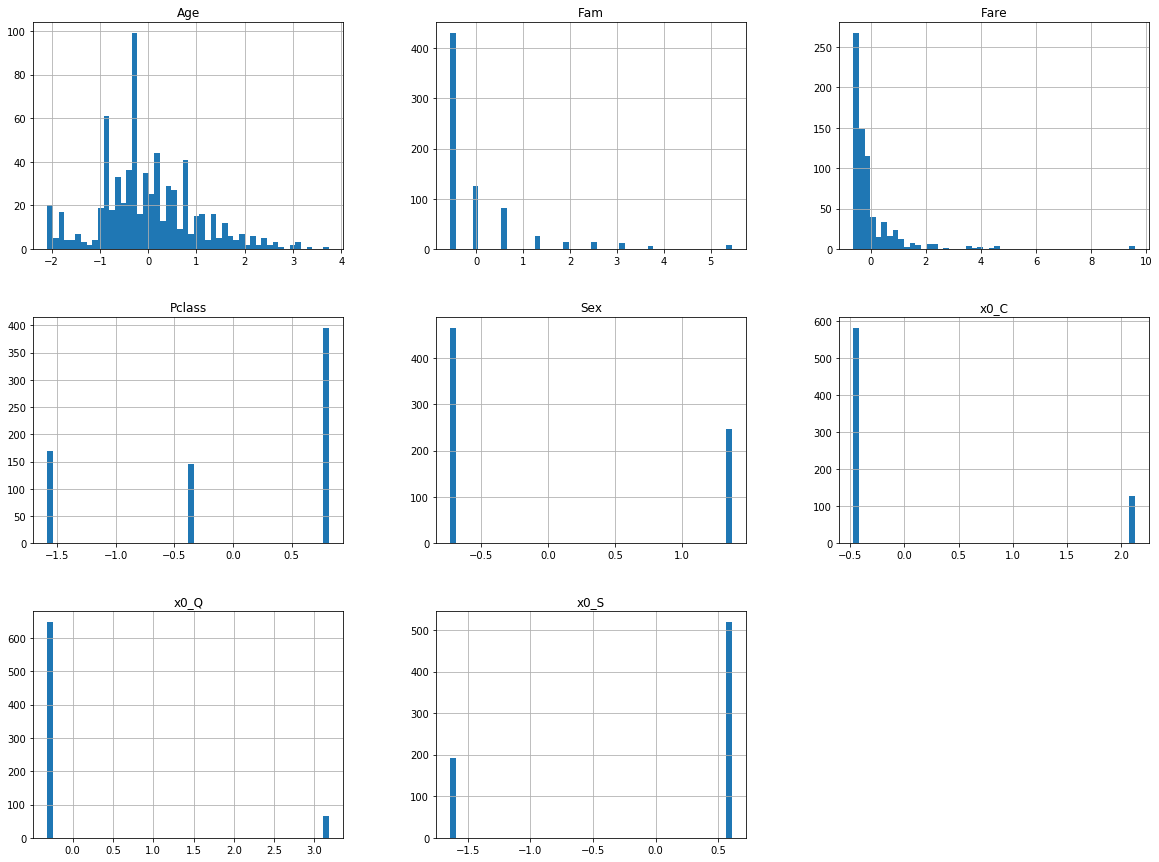

In [41]:
## Visualize standardized data
df_std.hist(bins=50, figsize=(20,15))
plt.show()

In [44]:
# Import scores 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
acc_scores = {}
ROC={}

In [45]:
# Define function to go through models
def models(model, X_train, y_train, X_test, y_test, model_name):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    acc_scores[model_name] = accuracy_score(y_test, y_pred)
    print(f"Acc_score of {model_name}: {acc_scores[model_name]}\n")
    ROC[model_name]=roc_auc_score(y_test, y_pred)
    print(f"Roc_auc_score: {ROC[model_name]} \n ")
    return model

In [47]:
# First model Svc_linear
from sklearn.svm import SVC, NuSVC, LinearSVC
Svc_linear = SVC(kernel='linear', C=1)
model1 = models(Svc_linear, X_train_std, y_train, X_test_std, y_test, 'Svc_linear')


Acc_score of Svc_linear: 0.7877094972067039

Roc_auc_score: 0.7732542819499342 
 


In [48]:
# Second model SVC_rbf
SVC_rbf = SVC()
model2 = models(SVC_rbf, X_train_std, y_train, X_test_std, y_test, 'SVC_rbf')


Acc_score of SVC_rbf: 0.8044692737430168

Roc_auc_score: 0.7787878787878787 
 


In [47]:
# Third model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()
model3 = models(Rf, X_train_std, y_train, X_test_std, y_test, 'Ran_for_clf',acc_scores)


Acc_score of Ran_for_clf: 0.8770949720670391

Roc_auc_score: 0.8567852437417653 
 


In [49]:
# Fourth model LogisticRegression
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression(random_state=0)
model4 = models(Log_reg, X_train_std, y_train, X_test_std, y_test, 'Log_Reg')


Acc_score of Log_Reg: 0.8156424581005587

Roc_auc_score: 0.7986824769433466 
 


Text(0, 0.5, 'Testing Accuracy')

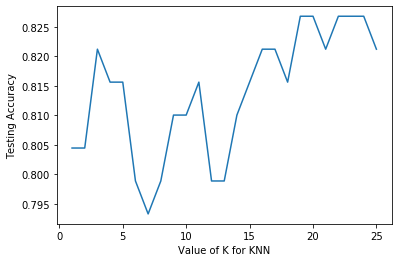

In [50]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [51]:
# 5th model KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=k)
model5 = models(KNN, X_train_std, y_train, X_test_std, y_test, 'KNN')


Acc_score of KNN: 0.8212290502793296

Roc_auc_score: 0.7897233201581028 
 


In [52]:
# 6th XGBoost
import xgboost as xgb
Xg_class = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model6 = models(Xg_class, X_train_std, y_train, X_test_std, y_test, 'Xg_class')


Acc_score of Xg_class: 0.8212290502793296

Roc_auc_score: 0.7816205533596838 
 


In [53]:
# 7th model SGDClassifier
from sklearn.linear_model import SGDClassifier
Sgd_class = SGDClassifier(max_iter=1000, tol=1e-3)
model7 = models(Sgd_class, X_train_std, y_train, X_test_std, y_test, 'Sgd_class')


Acc_score of Sgd_class: 0.7486033519553073

Roc_auc_score: 0.7576416337285903 
 


In [54]:
# 8th model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
Dec_tree_class = DecisionTreeClassifier(random_state=0)
model8 = models(Dec_tree_class, X_train_std, y_train, X_test_std, y_test, 'Dec_tree_class')


Acc_score of Dec_tree_class: 0.8156424581005587

Roc_auc_score: 0.7959815546772069 
 


In [55]:
# 9th model ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
extra_tree = ExtraTreeClassifier(random_state=0)
Bag_class_extra_tree = BaggingClassifier(extra_tree, random_state=0)
model9 = models(Bag_class_extra_tree, X_train_std, y_train, X_test_std, y_test, 'Bag_class_extra_tree')


Acc_score of Bag_class_extra_tree: 0.8379888268156425

Roc_auc_score: 0.8114624505928854 
 


In [56]:
# 10th model AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
Ada_class =AdaBoostClassifier()
model10 = models(Ada_class, X_train_std, y_train, X_test_std, y_test, 'Ada_class')


Acc_score of Ada_class: 0.8156424581005587

Roc_auc_score: 0.8040843214756257 
 


In [57]:
# Lets see the results of models
df_results = pd.DataFrame({'Models': list(acc_scores.keys()),
                          'Acc_Scores': list(acc_scores.values())})
df_results

,Models,Acc_Scores
0,Svc_linear,0.787709
1,SVC_rbf,0.804469
2,Log_Reg,0.815642
3,KNN,0.821229
4,Xg_class,0.821229
5,Sgd_class,0.748603
6,Dec_tree_class,0.815642
7,Bag_class_extra_tree,0.837989
8,Ada_class,0.815642


[Text(0, 0.5, 'Acc_Scores')]

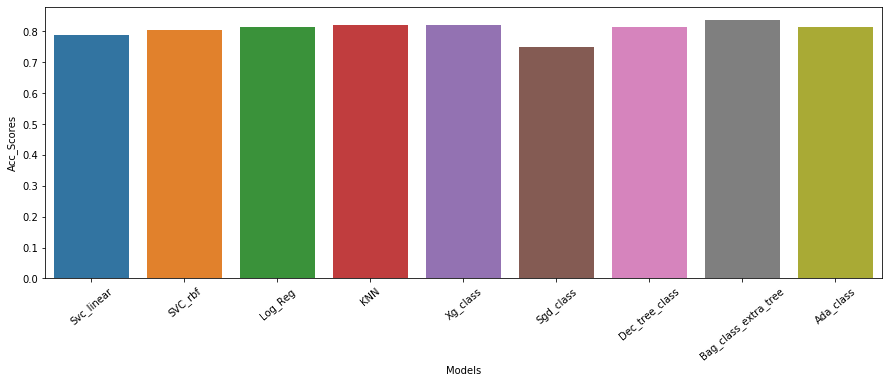

In [58]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = "Models", y = "Acc_Scores", data = df_results)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set(ylabel = "Acc_Scores")

In [60]:
# Let see which model gives the best result
print(f"The model with best Acc_score is {max(acc_scores, key=acc_scores.get)} and it's Acc_score is {acc_scores[max(acc_scores, key=acc_scores.get)]:.3f}.")

The model with best Acc_score is Ran_for_clf and it's Acc_score is 0.877.


In [61]:
# Lets plot the results ROC score of models
df_results2 = pd.DataFrame({'Models': list(ROC.keys()),
                          'ROC_scores': list(ROC.values())})
df_results2

,Models,ROC_scores
0,Svc_linear,0.773254
1,SVC_rbf,0.778788
2,Ran_for_clf,0.856785
3,Log_Reg,0.798682
4,KNN,0.789723
5,Xg_class,0.781621
6,Sgd_class,0.794993
7,Dec_tree_class,0.795982
8,Bag_class_extra_tree,0.811462
9,Ada_class,0.804084


[Text(0, 0.5, 'ROC_scores')]

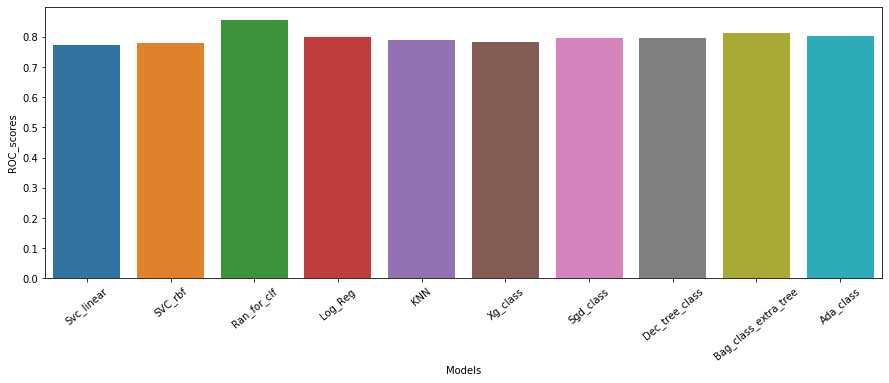

In [62]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = "Models", y = "ROC_scores", data = df_results2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set(ylabel = "ROC_scores")

In [63]:
# Let see which model gives the best ROC score
print(f"The model with best roc is {max(ROC, key=ROC.get)} and it's roc is {ROC[max(ROC, key=ROC.get)]:.3f}.")

The model with best acc is Ran_for_clf and it's acc is 0.857.


In [ ]:
# At the end let see how good is our prediction
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check.head(25)

In [ ]:
plot = sns.countplot(x = "Actual", hue='Predicted',data = df_check)

# THE END